# Polynomial Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Advertising.csv")

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
X = df.drop('sales', axis=1)

In [5]:
y = df['sales']

In [6]:
from sklearn.preprocessing import PolynomialFeatures

In [8]:
polynomial_converter = PolynomialFeatures(include_bias=False)

In [9]:
polynomial_converter.fit(X)

PolynomialFeatures(include_bias=False)

In [11]:
poly_features = polynomial_converter.transform(X)

In [12]:
X.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

In [13]:
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [14]:
polynomial_converter.fit_transform(X) #This can do both fit and transform in one step

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

In [15]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size = 0.3, random_state=101)

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
model = LinearRegression()

In [23]:
model.fit(X_train, y_train)

LinearRegression()

In [24]:
test_prediction = model.predict(X_test)

In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [26]:
MAE = mean_absolute_error(y_test, test_prediction)
MSE = mean_squared_error(y_test, test_prediction)
RSME = np.sqrt(MSE)


In [27]:
MAE

0.48967980448035886

In [28]:
MSE

0.44175055104033895

In [29]:
RSME

0.6646431757269

In [30]:
model.coef_

array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

In [31]:
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [32]:
X.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

In [33]:
# Create the different order poly
# split poly feat train/test
# fit on train
# store/save the Rmse for Both the train and test
# plot the results

In [34]:
train_rmse_errors = []
test_rmse_errors = []

for d in range(1,10):
    poly_converter = PolynomialFeatures(degree =d, include_bias=False)
    poly_features = poly_converter.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size = 0.3, random_state=101)

    model = LinearRegression()
    model.fit(X_train, y_train)

    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    train_RMSE = np.sqrt(mean_squared_error(y_train,train_pred))
    
    test_RMSE = np.sqrt(mean_squared_error(y_test,test_pred))
   
    train_rmse_errors.append(train_RMSE)
    test_rmse_errors.append(test_RMSE)

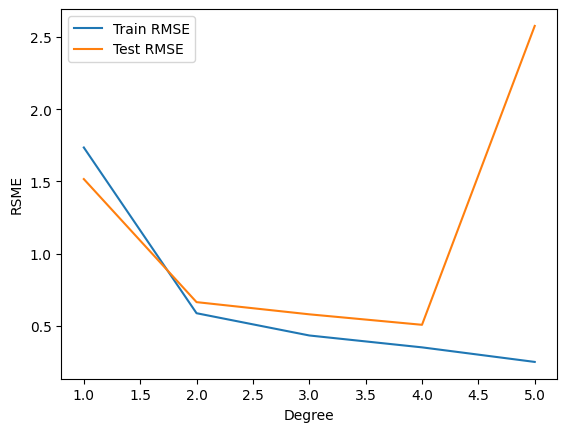

In [35]:
plt.plot(range(1,6), train_rmse_errors[:5], label='Train RMSE')
plt.plot(range(1,6), test_rmse_errors[:5], label='Test RMSE')

plt.xlabel('Degree')
plt.ylabel('RSME')
plt.legend()

In [36]:
#Choose degree 3

In [37]:
final_poly_converter = PolynomialFeatures(degree=3, include_bias=False)

In [38]:
final_model = LinearRegression()

In [39]:
full_converted_X = final_poly_converter.fit_transform(X)

In [40]:
final_model.fit(full_converted_X, y)

LinearRegression()

In [41]:
from joblib import dump, load

In [42]:
dump(final_model, 'final_poly_model.joblib')

['final_poly_model.joblib']

In [43]:
dump(final_poly_converter, 'final_converter.joblib')

['final_converter.joblib']

In [44]:
loaded_converter = load('final_converter.joblib')

In [45]:
loaded_model = load('final_poly_model.joblib')

In [46]:
campaign = [[149, 22, 12]]

In [47]:
transformed_data = loaded_converter.fit_transform(campaign)

In [48]:
loaded_model.predict(transformed_data)

array([14.64501014])